<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab2/blob/main/6351071071_LAB2_Bai5(Trang26_27)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Câu a


In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

# Đổi tên cột
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope',
              'num_major_vessels', 'thalassemia', 'target']

# Xóa dòng dữ liệu trống
df = df.dropna()

print("Nguyễn Hữu Toàn – 6351071071")
print(df.info())

Nguyễn Hữu Toàn – 6351071071
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dt

#Câu 3

Nguyễn Hữu Toàn – 6351071071


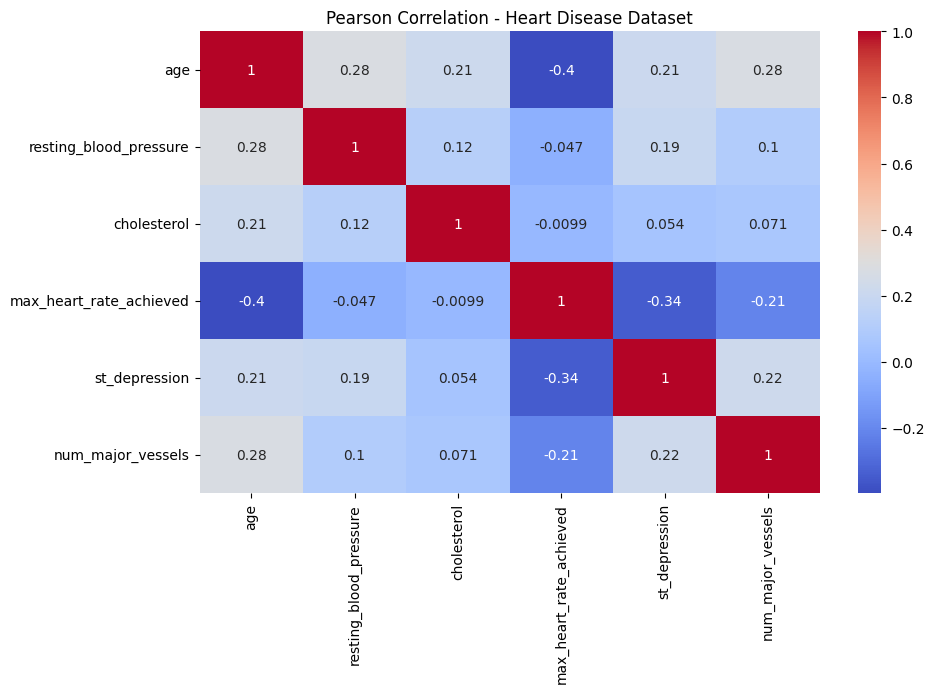

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Nguyễn Hữu Toàn – 6351071071")
numeric_cols = ['age', 'resting_blood_pressure', 'cholesterol',
                'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
numeric_data = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation - Heart Disease Dataset")
plt.show()

#Câu 4

In [17]:
features = df.drop('target', axis=1)
labels = df['target']

print("Nguyễn Hữu Toàn – 6351071071")
print("Features shape:", features.shape)
print("Labels shape  :", labels.shape)

Nguyễn Hữu Toàn – 6351071071
Features shape: (303, 13)
Labels shape  : (303,)


#Câu 5

In [18]:
categorical_cols = features.select_dtypes(exclude=['int64', 'float64']).columns
features_onehot = pd.get_dummies(features, columns=categorical_cols)

print("Nguyễn Hữu Toàn – 6351071071")
print("Shape của features sau khi one-hot:", features_onehot.shape)

Nguyễn Hữu Toàn – 6351071071
Shape của features sau khi one-hot: (303, 13)


#Câu 6

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.3, random_state=42)

print("Nguyễn Hữu Toàn – 6351071071")
print("Kích thước X_train:", X_train.shape)
print("Kích thước X_test :", X_test.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước y_test :", y_test.shape)

Nguyễn Hữu Toàn – 6351071071
Kích thước X_train: (212, 13)
Kích thước X_test : (91, 13)
Kích thước y_train: (212,)
Kích thước y_test : (91,)


#Câu 7

Nguyễn Hữu Toàn – 6351071071
ID3 Accuracy: 0.7252747252747253
Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



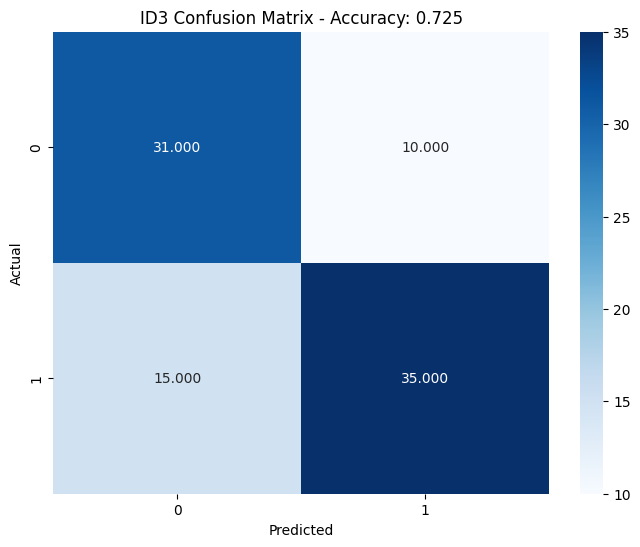

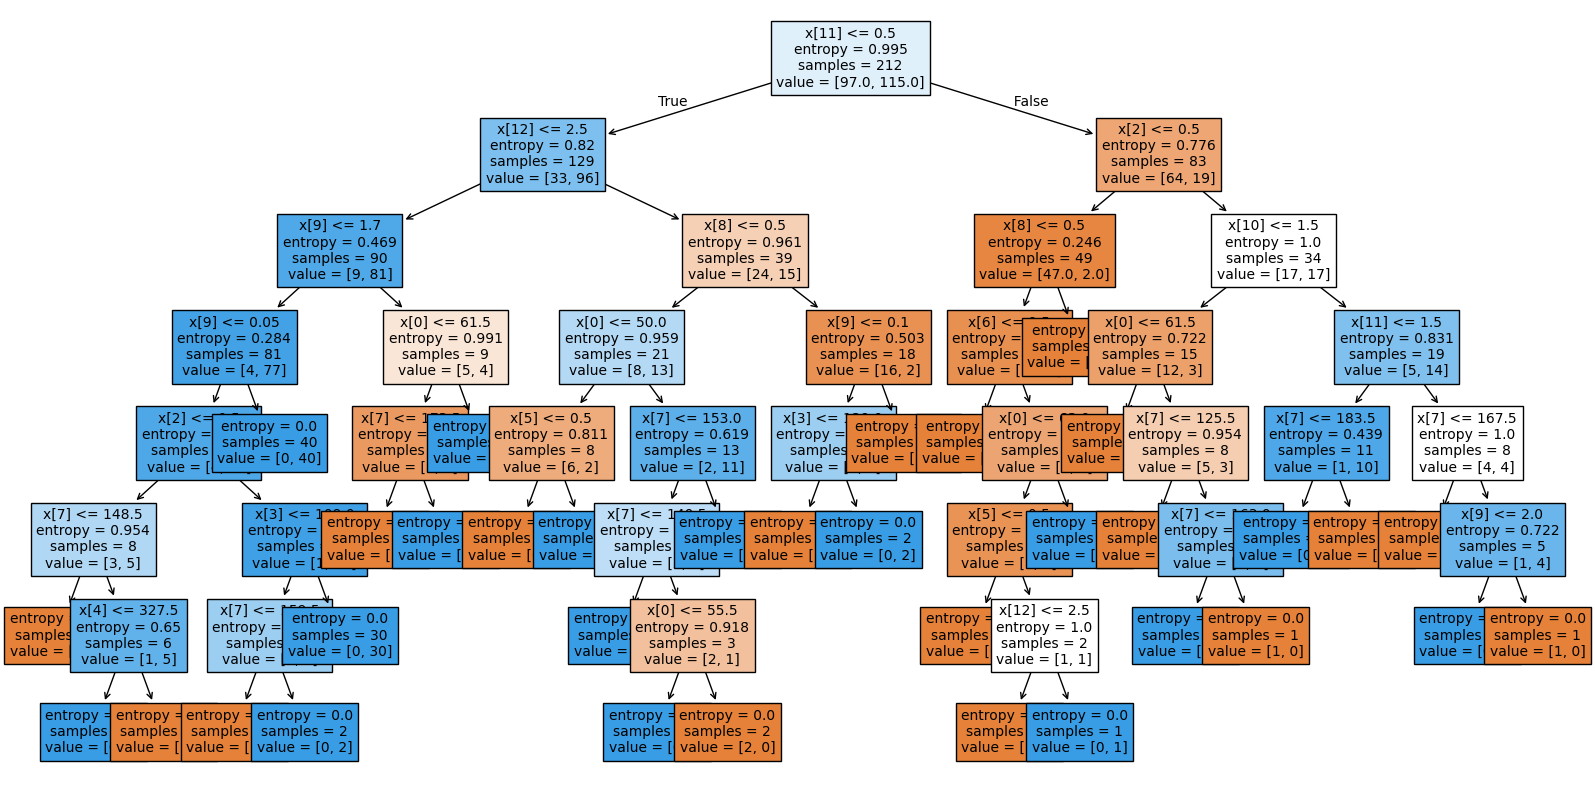

In [20]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)

print("Nguyễn Hữu Toàn – 6351071071")
print("ID3 Accuracy:", tree_score)
print("Report:\n", metrics.classification_report(y_test, tree_pred))

tree_cm = metrics.confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(8,6))
sns.heatmap(tree_cm, annot=True, fmt=".3f", cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'ID3 Confusion Matrix - Accuracy: {tree_score:.3f}')
plt.show()

fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

#Câu 8

Nguyễn Hữu Toàn – 6351071071
CART Accuracy: 0.7252747252747253
Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



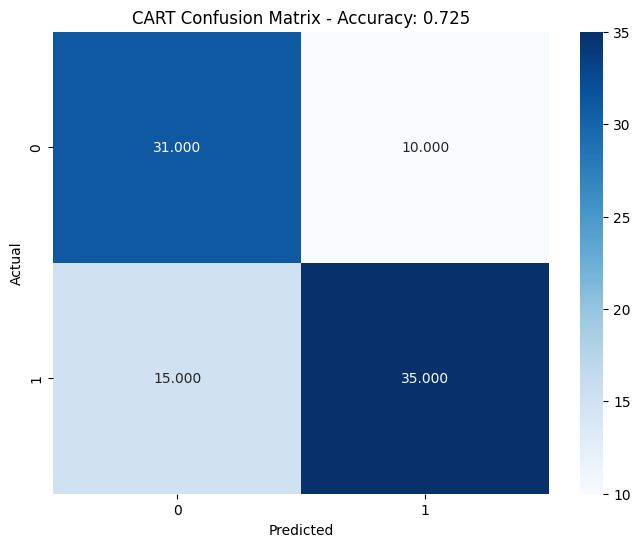

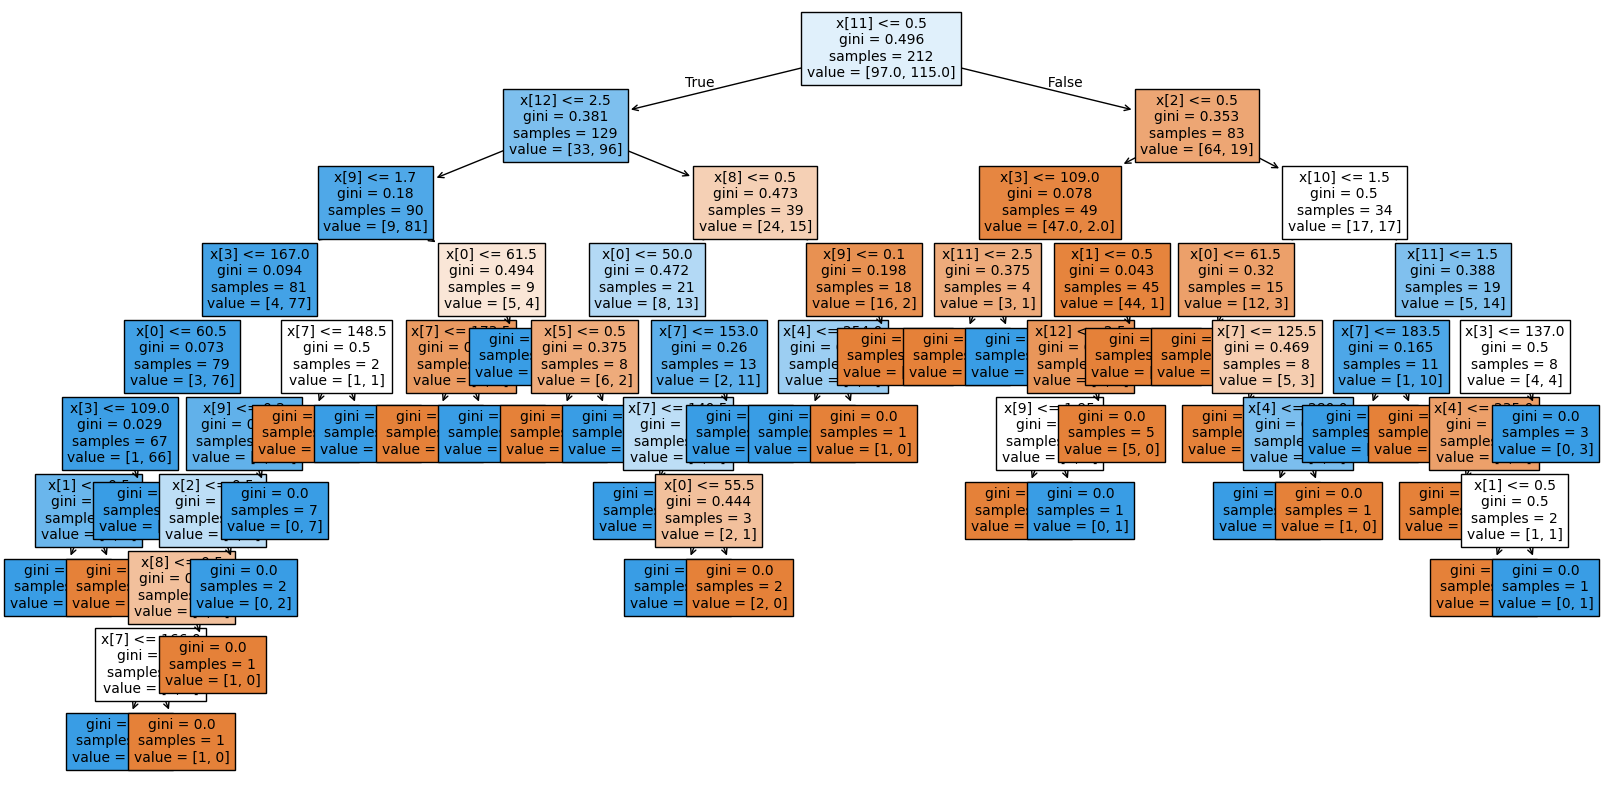

In [21]:
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)
cart_score = metrics.accuracy_score(y_test, cart_pred)

print("Nguyễn Hữu Toàn – 6351071071")
print("CART Accuracy:", cart_score)
print("Report:\n", metrics.classification_report(y_test, cart_pred))

cart_cm = metrics.confusion_matrix(y_test, cart_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cart_cm, annot=True, fmt=".3f", cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'CART Confusion Matrix - Accuracy: {cart_score:.3f}')
plt.show()

fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(clf_cart, filled=True, fontsize=10)
plt.show()

#Câu 9

Nguyễn Hữu Toàn – 6351071071
Naive Bayes Accuracy: 0.8351648351648352
Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



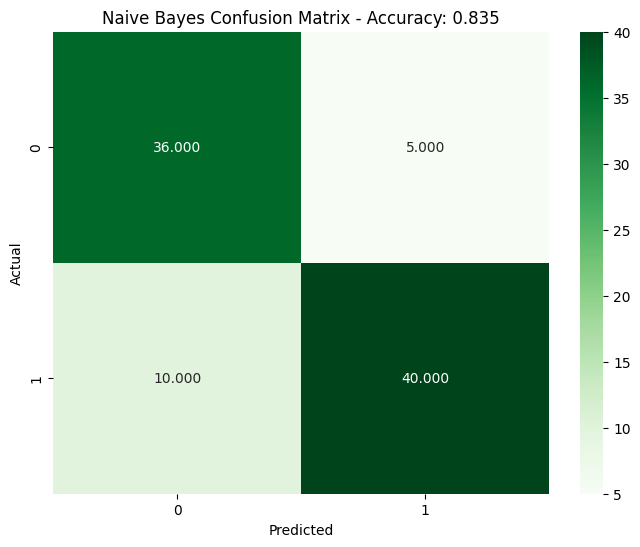

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)
bayes_score = metrics.accuracy_score(y_test, bayes_pred)

print("Nguyễn Hữu Toàn – 6351071071")
print("Naive Bayes Accuracy:", bayes_score)
print("Report:\n", metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
plt.figure(figsize=(8,6))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Naive Bayes Confusion Matrix - Accuracy: {bayes_score:.3f}')
plt.show()

#Câu 10

#Nguyễn Hữu Toàn - 6351071071

##1. Độ chính xác tổng thể
Mô hình ID3 Decision Tree và CART Decision Tree đều đạt accuracy khoảng 0.725, cho thấy khả năng dự đoán khá đồng đều giữa hai lớp. Mô hình Naive Bayes có accuracy cao hơn, khoảng 0.835, cho thấy hiệu quả tốt hơn trong trường hợp này.

##2.Nhận xét về dự đoán theo lớp
- ID3 và CART dự đoán khá cân bằng cho cả hai lớp 0 (không có bệnh) và 1 (có bệnh), precision và recall ở mức tương đối, nhưng chưa bằng Naive Bayes.

- Naive Bayes đạt recall cao cho lớp 0 (0.88) và lớp 1 (0.80), đồng thời precision cho cả hai lớp cũng cao, dẫn tới F1-score trung bình lên tới 0.83–0.84, cho thấy khả năng dự đoán tổng thể tốt hơn.

##3. Kết luận chung
- ID3 và CART phù hợp khi cần mô hình cây quyết định trực quan và cân bằng giữa các lớp.
- Naive Bayes phù hợp hơn trong trường hợp dữ liệu có các thuộc tính độc lập hoặc gần độc lập, đạt kết quả tốt hơn về accuracy và F1-score tổng thể.
- Trong bài Heart Disease, Naive Bayes vượt trội hơn, nhưng ID3 và CART vẫn có ưu điểm về giải thích trực quan và trực quan hóa cây quyết định.